This post demonstrates how to 
- Display a map from OpenStreetMaps using Folium
- Add custom shape files to define regions of interest
- Color the regions of interest based on data in a pandas dataframe
- (New) Brief introduction to GeoPandas.

The code of this post is available at https://github.com/rsandstroem/IPythonNotebooks/blob/master/GeoMapsFoliumDemo/GeoMapsFoliumDemo.ipynb .

_August 1, 2017: This post is almost a year old, but I decided to make some technical improvements to it to improve the viewing experience online. (It is the Swiss National Day after all!) During this renovation, I stumbled upon GeoPandas, which is a great package worth mentioning in this context._

# Getting map data and file formats

Using the method described here, you do not need any local map data. The maps are automatically pulled from OpenStreetMap.

However, you might want use concepts such as regions, and you need to define them through files containing those geolocations. There are multiple sources of data which is freely available, in this example we are using shape files from this location:
http://data.geo.admin.ch.s3.amazonaws.com/ch.swisstopo.swissboundaries3d-kanton-flaeche.fill/data.zip

We have provided the shape files we will use for this demonstration, normally you would need to retrieve and unpack the map data.

There are many file formats commonly used for maps. In this case what we have are a set of shapefiles. Since we will be working with geojson files in this demonstration you need to convert them to geojson.

A sample geojson file has been supplied with this tutorial, but for reference you can create a geojson file from the shape files from a console like this:

```
ogr2ogr -f GeoJSON -t_srs EPSG:4326 -simplify 1000 switzerland.geojson swissBOUNDARIES3D_1_2_TLM_KANTONSGEBIET.shp
```

You now have a map in your local directory, formatted as a geojson file. I use the `simplify` option to reduce the file size, at the expense of accuracy.

# Set up

For this demonstration we need "folium". Install it using 

```
pip install folium
```

or if you are using the Anaconda you can do 

```
sudo conda install --channel https://conda.binstar.org/IOOS folium
```

where you can replace the channel with your choice from the options listed by

```
binstar search -t conda folium
```

In [2]:
import folium


# Display the map

First we show the map without any use of the geojson we created from the shapefiles.

In [3]:
kanton_map = folium.Map(location=[46.8, 8.33],
                   tiles='Mapbox Bright', zoom_start=7)
kanton_map

You should now see an map of Switzerland with surrounding countries and cities. 
Next, display an OpenStreetMap and overlay the cantons of Switzerland on top from the geojson file created earlier.

In [9]:
kanton_map.choropleth(geo_data='switzerland.geojson')
kanton_map

# Import demographics data from a csv into a pandas data frame

The purpose of using a color filled map like the one above is usually to have the color represent something in the data, e.g., sales revenue per district. Since this data is separate from the geometrical description we need to retrieve it from an external source and join it with the geometrical shapes from the geojson file.

Read in some data for the canton's of Switzerland from a csv file. We will display this data on the map we just created.

In [6]:
import pandas as pd
kanton_overview = r'Switzerland_overview.csv'
kanton_data = pd.read_csv(kanton_overview)
kanton_data

,Abbr,Canton,Capital,Population,Area,Density,Municipalities,Official languages,CantonNumber
0,ZH,Zurich,Zurich,1463459,1729,701,171,German,1
1,BE,Bern,Bern,1001281,5959,158,383,"German, French",2
2,LU,Luzern,Luzern,390349,1493,233,87,German,3
3,UR,Uri,Altdorf,35865,1077,33,20,German,4
4,SZ,Schwyz,Schwyz,151396,908,143,30,German,5
5,OW,Obwalden,Sarnen,36507,491,66,7,German,6
6,NW,Nidwalden,Stans,41888,276,138,11,German,7
7,GL,Glarus,Glarus,39593,685,51,3,German,8
8,ZG,Zug,Zug,118118,239,416,11,German,9
9,FR,Fribourg,Fribourg,297622,1671,141,167,"French, German",10


# Color code the cantons based on their population density

The KANTONSNUM in the json file is used to ensure correct assignment of the data in the demographics data file.
Try using the name of the cantons instead. What happens, and why? (Hint: open the geojson file and compare with the csv file.)

In [12]:
kanton_map2 = folium.Map(location=[46.8, 8.33], 
                    zoom_start=7.5)
kanton_map2.choropleth(geo_data='switzerland.geojson', data=kanton_data,
             columns=['CantonNumber', 'Density'],
             key_on='feature.properties.KANTONSNUM',
             threshold_scale=[100, 200, 300, 500, 1000, 5000],
             fill_color='BuPu')
kanton_map2

# Using GeoPandas

While making some technical improvements to this post, I stumbled upon [GeoPandas](http://geopandas.org). While I cannot say I have used it much yet, I think it is a great way to read in geojson files and work with their contents.

In [14]:
import geopandas as gpd
df = gpd.read_file('switzerland.geojson')
print(df.columns)
df.head()

Index(['UUID', 'DATUM_AEND', 'DATUM_ERST', 'ERSTELL_J', 'ERSTELL_M',
       'REVISION_J', 'REVISION_M', 'GRUND_AEND', 'HERKUNFT', 'HERKUNFT_J',
       'HERKUNFT_M', 'OBJEKTART', 'KANTONSNUM', 'SEE_FLAECH', 'REVISION_Q',
       'KANTONSFLA', 'KT_TEIL', 'NAME', 'ICC', 'EINWOHNERZ', 'geometry'],
      dtype='object')


,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,OBJEKTART,KANTONSNUM,SEE_FLAECH,REVISION_Q,KANTONSFLA,KT_TEIL,NAME,ICC,EINWOHNERZ,geometry
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2014-10-31,2012-10-26,2012,10,2015,1,verbessert,swisstopo,2014,...,Kanton,18,0.0,1412_Aufbau,710539.0,0,Graubünden,CH,194935,POLYGON Z ((8.878214669955852 46.8142107947290...
1,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2014-10-31,2012-10-26,2012,10,2015,1,verbessert,swisstopo,2014,...,Kanton,2,11897.0,1412_Aufbau,595956.0,1,Bern,CH,1000918,POLYGON Z ((7.237992928187036 46.5550699033581...
2,{54B25E50-30A7-4995-ADE3-5FFF6E13A995},2014-10-31,2012-10-26,2012,10,2015,1,verbessert,swisstopo,2014,...,Kanton,23,1060.0,1412_Aufbau,522450.0,0,Valais,CH,326553,POLYGON Z ((8.411360233490436 46.6542191237368...
3,{921DFEF2-6D91-4CB8-9CFC-2A831C412020},2014-10-31,2012-10-26,2012,10,2015,1,verbessert,swisstopo,2014,...,Kanton,22,39089.0,1412_Aufbau,321200.0,1,Vaud,CH,748815,POLYGON Z ((6.780677661693769 46.8542740178914...
4,{95F10F52-8B2F-4D6A-AF7E-D4F915E42F89},2014-10-31,2012-10-26,2012,10,2015,1,verbessert,swisstopo,2014,...,Kanton,21,7152.0,1412_Aufbau,281215.0,0,Ticino,CH,346472,POLYGON Z ((8.478723733515089 46.5288928701094...


Very easy to make a pandas dataframe from this json file! Every row represents one area, and the last column contains the shape of the area as a three dimensional polygon, i.e., the longitude, latitude and altitude of the regional borders. The dataframe also contains data columns, such as number of inhabitants (EINWOHNERZ) and surface area (KANTONSFLA).

A nice feature of using GeoPandas in a Jupyter Notebook is the ease at which we can draw the content of the dataframe:

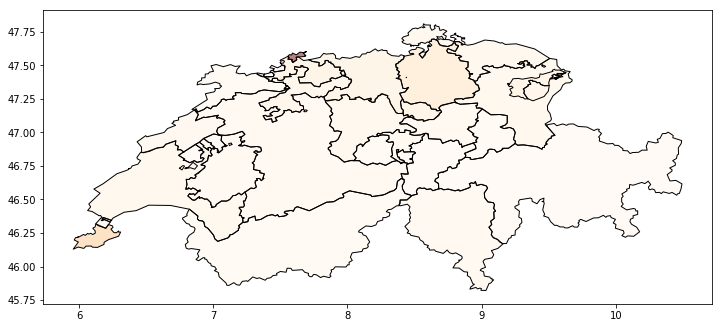

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
ax.set_aspect('equal')
df = df.to_crs({'init': 'epsg:4326'}) # change projection
df['density'] = df.EINWOHNERZ / df.KANTONSFLA # calculate population density
df.plot(ax=ax, column='density', cmap='OrRd')

Since the geometry of the cantons are represented as Shapely polygons, Jupyter can render them directly. For example, the canton of Valais has index 2 in the dataframe `df`:

<class 'shapely.geometry.polygon.Polygon'>


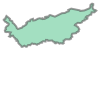

In [8]:
print type(df.geometry[2])
df.geometry[2]

# Example: Find mountains along the borders.

Let's combined what we learned and add map pins for mountains on the border where the altitude exceeds 3500 m. First we extract the three dimensional points from the dataframe where the altitude exceeds 3500 m.

In [9]:
import numpy as np

peaks = list()
for kanton in df.index:
    arr = np.array(df.geometry[kanton].exterior.coords)
    peaks.append(arr[np.where(arr[:,2]>3500)].tolist())
peaks = [item for sublist in peaks for item in sublist] # flatten to a single list of 3d points 
print peaks[:3]

[[8.91603243665709, 46.812444938780914, 3604.6812499999796], [9.960072829925547, 46.37943103812307, 3901.2637499999837], [9.935780191298486, 46.37607724456639, 3889.3874999999825]]


Then we create a feature group consisting of map markers for the peaks we found in the previous step. The altitude is added as a pop-up that will be displayed if the user clicks on a map marker. Finally we add this new feature group to the populations density map which we created earlier.

In [10]:
feature_group = folium.FeatureGroup("Locations")
for peak in peaks:
    feature_group.add_child(folium.Marker(location=[peak[1], peak[0]], popup=str(peak[2]))) 
kanton_map2.add_child(feature_group)
kanton_map2

The regions with high border mountains are located along the southern border of Switzerland, the Alpes. According to the population density we overlayed earlier, the cantons with high mountains are also the least populated. Hardly surprising, it is hard to commute to work if you live on top of a glacier!